In [1]:
# Dimitrios Bakalis, A.M : 3033

import pandas as pd 
from pandas import DataFrame

import numpy as np

import sklearn
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import sklearn.metrics as metrics
import sklearn.cluster as sk_cluster

import seaborn as sns

import matplotlib.pyplot as plt

import time

import math
import operator
import json 
import random
import nltk

In [2]:
df = pd.read_excel('CBS_simcaUV.xlsx', engine='openpyxl')
df.head(5)

,Primary ID,Title,cat,i_desc_Atom_Count,i_desc_Atoms_in_Ring_System,i_desc_Bond_Count,i_desc_Bonds_in_Ring_System,i_desc_Centralization,i_desc_Chirality_count,i_desc_Cyclomatic_number,...,r_qp_QPpolrz,r_qp_SASA,r_qp_SAamideO,r_qp_SAfluorine,r_qp_WPSA,r_qp_accptHB,r_qp_donorHB,r_qp_glob,r_qp_mol_MW,r_qp_volume
0,1,THBH,1,-1.653000,-1.86070,-1.748970,-1.946260,-0.942154,-0.317975,-2.085210,...,-1.949510,-1.669490,-0.1615,-0.296569,-0.621067,-0.603596,3.075880,1.487990,-1.665400,-1.676120
1,2,NSC11041,1,-1.365940,-1.20240,-1.369930,-1.148460,-0.889152,-0.317975,-1.188500,...,-1.638970,-1.609730,-0.1615,-0.296569,-0.621067,-0.085276,1.272130,1.629610,-1.462700,-1.584410
2,3,SP14311008,1,-0.648317,-0.21495,-0.611839,-0.191094,-0.626349,0.677360,-0.291796,...,-0.368193,-0.604741,-0.1615,-0.296569,-0.621067,0.329380,-1.253120,0.760001,-0.735769,-0.537906
3,4,MBSEW03275,1,-0.648317,-1.03782,-0.738187,-1.148460,-0.582180,-0.317975,-1.188500,...,-0.756327,-0.811667,-0.1615,4.325620,2.461660,-0.707260,-1.253120,0.542465,-0.480656,-0.847905
4,5,MNP2-A6,1,-0.504792,-1.03782,-0.611839,-1.148460,-0.526969,-0.317975,-1.188500,...,-0.656196,-0.581288,-0.1615,-0.296569,1.187150,0.433044,0.189877,0.625055,-0.362730,-0.542712


In [3]:
def get_real_labels():

    real_labels = df['cat'].tolist()

    i=-1
    for label in real_labels:
        i+=1
        if label == 1:
            real_labels[i] = 0
        elif label == 2:
            real_labels[i] = 1
        else:
            real_labels[i] = 2

    return real_labels

In [4]:
compound_list = df.values.tolist()                   # list that holds the values of the compounds from our dataframe

i=-1
for compound in compound_list:
    i+=1
    compound_list[i]=compound[3:]

compound_array = np.array(compound_list)             # we transform our compound list into an array
compound_array = np.nan_to_num(compound_array)       # we replace the Nan values with zeros

print("compound array dimensions ",compound_array.shape)

real_labels = get_real_labels()                  

compound array dimensions  (673, 243)


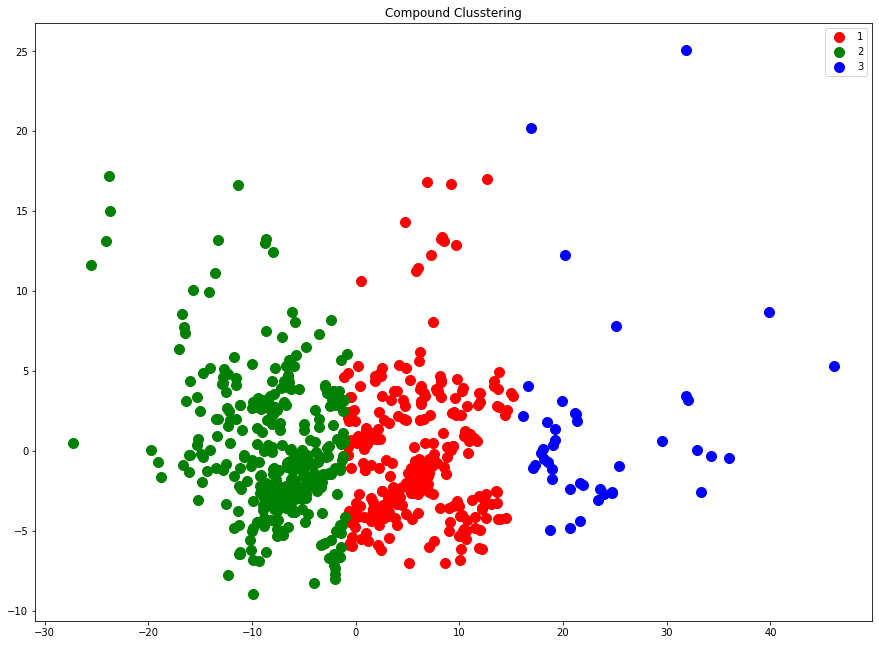

In [5]:
# K-means clusstering (with 3 clustters)

from sklearn.decomposition import PCA

kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=3, n_init=100)
kmeans.fit_predict(compound_array)
centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_
error = kmeans.inertia_

pca = PCA(n_components=2)

reduced_data = pca.fit_transform(compound_array)
reduced_centroinds = pca.fit_transform(centroids)

plt.figure(figsize=(15, 11))

plt.scatter(reduced_data[kmeans_labels == 0, 0], reduced_data[kmeans_labels == 0, 1], s = 100, c = 'red', label='1')
plt.scatter(reduced_data[kmeans_labels == 1, 0], reduced_data[kmeans_labels == 1, 1], s = 100, c = 'green', label='2')
plt.scatter(reduced_data[kmeans_labels == 2, 0], reduced_data[kmeans_labels == 2, 1], s = 100, c = 'blue', label='3')

plt.title('Compound Clusstering')
plt.legend()
plt.show()

[[ 14  41   5]
 [161 192  16]
 [106 116  22]]


<AxesSubplot:>

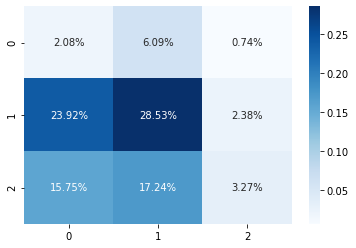

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(real_labels,kmeans_labels)
print(mat)

sns.heatmap(mat/np.sum(mat), annot=True, 
            fmt='.2%', cmap='Blues')

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

import seaborn as sns

from sklearn.model_selection import train_test_split

classifiers = [
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    SVC(),                             
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),                   
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]                

names = ["Gradient Boosting","Nearest Neighbors", "RBF SVM",  
        "Decision Tree", "AdaBoost", "Random Forest", "MLP", 
        "Naive Bayes", "QDA","Logistic Regression"]              

def neural_networks_accuracy(data,real_labels):

    log_cols=["Classifier", "Accuracy"]
    log = pd.DataFrame(columns=log_cols)

    X_train, X_test, y_train, y_test = train_test_split(data, real_labels, test_size=0.3,random_state=109) # 70% of our data for training and the rest 30% for testing

    print("==============================")

    name_flag = -1
    for classifier in classifiers: 
        name_flag+=1

        start_time = time.time()

        scores = cross_val_score(classifier, X_train, y_train, cv=10)  # 10-k fold validation
        train_acc = scores.mean()                                      # we calculate the mean train accuracy score

        print(names[name_flag])
        print('****Results****')

        print("train accuracy score",train_acc)

        classifier.fit(X_train, y_train)

        test_acc = classifier.score(X_test, y_test)

        print("test accuracy score ", test_acc)
        
        log_entry = pd.DataFrame([[names[name_flag], test_acc*100]], columns=log_cols)
        log = log.append(log_entry)

        print("--- %s seconds ---" % (time.time() - start_time))

        print("==============================")

    log = log.sort_values(by=['Accuracy'], ascending=False)

    sns.set_color_codes("muted")
    sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

    plt.xlabel('Accuracy %')
    plt.title('Classifier Accuracy')
    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

neural_networks_accuracy(compound_array,real_labels) 

Gradient Boosting
****Results****
train accuracy score 0.5987145390070923
test accuracy score  0.599009900990099
--- 47.361388206481934 seconds ---
Nearest Neighbors
****Results****
train accuracy score 0.5945921985815603
test accuracy score  0.5792079207920792
--- 0.04904437065124512 seconds ---
RBF SVM
****Results****
train accuracy score 0.6072695035460993
test accuracy score  0.5792079207920792
--- 0.25122809410095215 seconds ---
Decision Tree
****Results****
train accuracy score 0.5226950354609927
test accuracy score  0.5297029702970297
--- 0.5695183277130127 seconds ---
AdaBoost
****Results****
train accuracy score 0.5964982269503547
test accuracy score  0.5891089108910891
--- 3.837657928466797 seconds ---
Random Forest
****Results****
train accuracy score 0.6200797872340427
test accuracy score  0.6089108910891089
--- 3.5661461353302 seconds ---


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\neural

MLP
****Results****
train accuracy score 0.5902482269503546


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


test accuracy score  0.6435643564356436
--- 8.938622951507568 seconds ---
Naive Bayes
****Results****
train accuracy score 0.5350177304964537
test accuracy score  0.5445544554455446
--- 0.02502274513244629 seconds ---


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitri

QDA
****Results****
train accuracy score 0.5626329787234042
test accuracy score  0.5247524752475248
--- 0.7016382217407227 seconds ---


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

Logistic Regression
****Results****
train accuracy score 0.5986702127659574
test accuracy score  0.6435643564356436
--- 0.7036406993865967 seconds ---


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


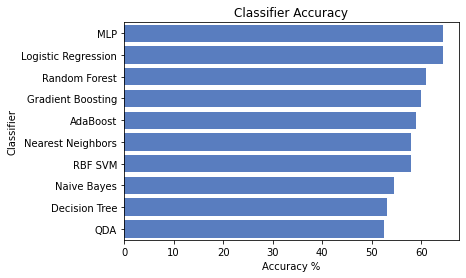

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))  # feature_range=(0,1)

data_scaled = scaler.fit_transform(compound_array)

neural_networks_accuracy(data_scaled,real_labels) 

In [37]:
X = df.iloc[:,3:]           # independent columns
data = X.fillna(0)          # removing NaN values

labels = df.iloc[:,2:3]

print("data shape", data.shape)
print("labels shape", labels.shape)

data shape (673, 243)
labels shape (673, 1)


In [163]:
reduced_features_list = []   # list that holds the extracted features from the mathematical models used for feaure selection

0.59 accuracy with a standard deviation of 0.07


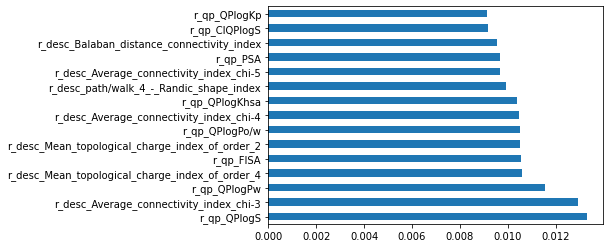

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()  # 
scores = cross_val_score(model, data, labels, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std())) 

model.fit(data,labels) 
feat_importances = pd.Series(model.feature_importances_, index=data.columns)  # plot graph of feature importances for better visualization
feat_importances.nlargest(15).plot(kind='barh')
plt.show() 

0.53 accuracy with a standard deviation of 0.06


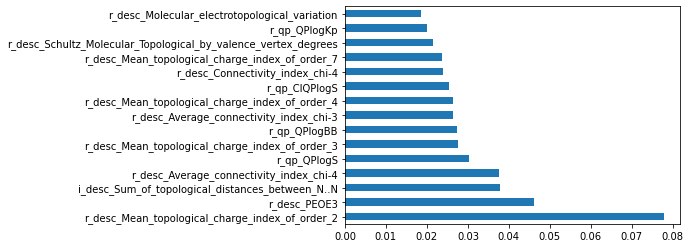

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier()  # 
scores = cross_val_score(model, data, labels, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std())) 

model.fit(data,labels) 
feat_importances = pd.Series(model.feature_importances_, index=data.columns)  # plot graph of feature importances for better visualization
feat_importances.nlargest(15).plot(kind='barh')
plt.show() 

In [110]:
from ITMO_FS.filters.univariate import chi2_measure

labels = np.array(labels)

scaler = MinMaxScaler(feature_range=(0,1))                 # we scale our data to values between 0-1 to eliminate the negative values
data_scaled = scaler.fit_transform(data)

scores = chi2_measure(data_scaled, labels)                 # Chi^2

column_names = data.columns

chi2_measure_dict = {}
i=-1
for score in scores:
    i+=1
    chi2_measure_dict[column_names[i]] = score

sorted_chi2_measure_dict = dict( sorted(chi2_measure_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

df_chi2_measure = pd.DataFrame.from_dict(sorted_chi2_measure_dict, orient='index') 

print(df_chi2_measure.head(15))

                                                            0
r_desc_Lopping_centric                              36.834054
r_desc_Balaban_centric                              30.899162
r_desc_Total_structure_connectivity                 13.876689
i_desc_Sum_of_topological_distances_between_Br..Br  10.216667
i_desc_Sum_of_topological_distances_between_Br..I   10.216667
i_desc_Sum_of_topological_distances_between_N..I    10.216667
r_desc_PEOE14                                        8.527800
i_qp_#acid                                           7.578468
i_qp_RuleOfThree                                     7.051827
i_desc_Chirality_count                               6.557786
i_desc_Sum_of_topological_distances_between_O..O     6.088582
r_desc_MR1                                           5.610769
i_qp_#stars                                          5.348696
i_qp_RuleOfFive                                      5.090127
i_qp_#rtvFG                                          4.898048


In [164]:
index = df_chi2_measure.index
a_list = list(index)
reduced_features_list.append(a_list[0:6]) 

In [44]:
from ITMO_FS.filters.univariate import information_gain

labels = np.array(labels)

scores = information_gain(data, labels)                 # Information Gain

column_names = data.columns

information_gain_dict = {}
i=-1
for score in scores:
    i+=1
    information_gain_dict[column_names[i]] = score

sorted_information_gain_dict = dict( sorted(information_gain_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

df_information_gain = pd.DataFrame.from_dict(sorted_information_gain_dict, orient='index') 

print(df_information_gain.head(15))

                                                           0
r_qp_SASA                                           0.912854
r_qp_glob                                           0.912854
r_qp_volume                                         0.912854
r_qp_PSA                                            0.910794
r_qp_FISA                                           0.909137
r_qp_QPPCaco                                        0.909137
r_desc_Average_valence_connectivity_index_chi-3     0.908735
r_desc_Average_valence_connectivity_index_chi-4     0.908735
r_desc_Average_valence_connectivity_index_chi-5     0.908735
r_desc_Balaban-type_index_from_Z_weighted_dista...  0.908735
r_desc_Balaban-type_index_from_electronegativit...  0.908735
r_desc_Balaban-type_index_from_mass_weighted_di...  0.908735
r_desc_Balaban-type_index_from_polarizability_w...  0.908735
r_desc_Balaban-type_index_from_van_der_waals_we...  0.908735
r_desc_E-state_topological_parameter                0.908735


In [165]:
index = df_information_gain.index
a_list = list(index)
reduced_features_list.append(a_list[0:6])  

In [41]:
from ITMO_FS.filters.univariate import gini_index

labels = np.array(labels)

scores = gini_index(data, labels)      # Gini Index

column_names = data.columns

gini_index_dict = {}
i=-1
for score in scores:
    i+=1
    gini_index_dict[column_names[i]] = score

sorted_gini_index_dict = dict( sorted(gini_index_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

df_gini_index = pd.DataFrame.from_dict(sorted_gini_index_dict, orient='index') 

print(df_gini_index.head(15))

                                                           0
i_desc_Sum_of_topological_distances_between_Br..Br  1.000000
i_desc_Sum_of_topological_distances_between_Br..I   1.000000
i_desc_Sum_of_topological_distances_between_N..I    1.000000
r_desc_Balaban_centric                              1.000000
r_desc_Lopping_centric                              1.000000
r_desc_Total_structure_connectivity                 0.765858
i_desc_Sum_of_topological_distances_between_F..Br   0.744069
r_desc_ALOGP8                                       0.713516
i_qp_#acid                                          0.699814
i_desc_Sum_of_topological_distances_between_O..Br   0.603965
r_desc_MR1                                          0.580286
i_desc_Ring_Count_8                                 0.576429
r_desc_PEOE14                                       0.494007
i_desc_Sum_of_topological_distances_between_O..O    0.422991
r_desc_PEOE13                                       0.370243


In [166]:
index = df_gini_index.index
a_list = list(index)
reduced_features_list.append(a_list[0:5]) 

In [42]:
from ITMO_FS.filters.univariate import pearson_corr

labels = np.array(labels)

scores = pearson_corr(data, labels)      # Pearson Correlation Coefficient

column_names = data.columns

pearson_corr_dict = {}
i=-1
for score in scores:
    i+=1
    pearson_corr_dict[column_names[i]] = score

sorted_pearson_corr_dict = dict( sorted(pearson_corr_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

df_pearson_corr = pd.DataFrame.from_dict(sorted_pearson_corr_dict, orient='index') 

print(df_pearson_corr.head(15))

                                                0
r_desc_Narumi_Geometric_Topological      0.297086
r_desc_Narumi_Harmonic_Topological       0.285059
r_desc_Molecule_cyclized_degree          0.283700
i_desc_Cyclomatic_number                 0.228305
r_desc_Spanning_tree_number              0.221936
i_desc_Total_ring_size                   0.218361
i_desc_Bonds_in_Ring_System              0.216655
i_desc_Atoms_in_Ring_System              0.215109
i_qp_#ringatoms                          0.214593
i_desc_Ring_perimeter                    0.212586
i_desc_Number_of_ring_systems            0.212339
i_qp_#in56                               0.211276
r_desc_PEOE3                             0.206370
r_desc_path/walk_5_-_Randic_shape_index  0.203078
r_desc_path/walk_4_-_Randic_shape_index  0.196854


In [167]:
index = df_pearson_corr.index
a_list = list(index)
reduced_features_list.append(a_list[0:15]) 

In [43]:
from ITMO_FS.filters.univariate import f_ratio_measure

labels = np.array(labels)

scores = f_ratio_measure(data, labels)      # Fisher Ratio

column_names = data.columns

f_ratio_dict = {}
i=-1
for score in scores:
    i+=1
    f_ratio_dict[column_names[i]] = score

sorted_f_ratio_dict = dict( sorted(f_ratio_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

df_f_ratio = pd.DataFrame.from_dict(sorted_f_ratio_dict, orient='index') 

print(df_f_ratio.head(15))

                                                         0
i_desc_Centralization                             7.987138
r_desc_PEOE9                                      3.650849
r_qp_CIQPlogS                                     2.254646
i_desc_Ring_Count_5                               2.118162
i_desc_Sum_of_topological_distances_between_N..N  1.832538
r_qp_QPlogHERG                                    1.574513
r_qp_QPlogKhsa                                    1.220365
i_desc_Number_of_ring_systems                     1.203018
r_desc_First_Mohar                                1.067406
r_qp_QPlogS                                       1.054799
r_desc_Global_topological_charge                  0.927670
r_desc_Narumi_Harmonic_Topological                0.898511
r_qp_glob                                         0.874376
r_desc_Mean_topological_charge_index_of_order_2   0.820876
i_qp_#in56                                        0.731593


In [168]:
index = df_f_ratio.index
a_list = list(index)
reduced_features_list.append(a_list[0:10])   

In [169]:
best_features = []
best_features.append('cat')
for feature_stacked in reduced_features_list:
    for feature in feature_stacked:
        best_features.append(feature)
print("Number of new reduced features",len(best_features)-1)

Number of new reduced features 42


In [170]:
df_reduced = df[best_features].copy()
print(df_reduced.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 43 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   cat                                                 673 non-null    int64  
 1   r_desc_Lopping_centric                              673 non-null    float64
 2   r_desc_Balaban_centric                              673 non-null    float64
 3   r_desc_Total_structure_connectivity                 673 non-null    float64
 4   i_desc_Sum_of_topological_distances_between_Br..Br  673 non-null    float64
 5   i_desc_Sum_of_topological_distances_between_Br..I   673 non-null    float64
 6   i_desc_Sum_of_topological_distances_between_N..I    673 non-null    float64
 7   r_qp_SASA                                           672 non-null    float64
 8   r_qp_glob                                           672 non-null    float64
 9  

In [171]:
compound_list = df_reduced.values.tolist()           # list that holds the values of the compounds from our reduced dataframe

i=-1
for compound in compound_list:
    i+=1
    compound_list[i]=compound[1:]

compound_array = np.array(compound_list)             # we transform our compound list into an array
compound_array = np.nan_to_num(compound_array)       # we replace the Nan values with zeros

print("compound array dimensions ",compound_array.shape)

real_labels = real_labels = df_reduced['cat'].tolist()                  

compound array dimensions  (673, 42)


Gradient Boosting
****Results****
train accuracy score 0.6070921985815603
test accuracy score  0.6039603960396039
--- 8.304115295410156 seconds ---
Nearest Neighbors
****Results****
train accuracy score 0.63927304964539
test accuracy score  0.5792079207920792
--- 0.04203677177429199 seconds ---
RBF SVM
****Results****
train accuracy score 0.5838652482269504
test accuracy score  0.5594059405940595
--- 0.1481342315673828 seconds ---
Decision Tree
****Results****
train accuracy score 0.5648049645390072
test accuracy score  0.5099009900990099
--- 0.1000826358795166 seconds ---
AdaBoost
****Results****
train accuracy score 0.5540780141843972
test accuracy score  0.5346534653465347
--- 1.1530489921569824 seconds ---
Random Forest
****Results****
train accuracy score 0.6138297872340426
test accuracy score  0.6287128712871287
--- 2.2348713874816895 seconds ---


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\neural

MLP
****Results****
train accuracy score 0.6094858156028369


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables ar

test accuracy score  0.5891089108910891
--- 5.411782503128052 seconds ---
Naive Bayes
****Results****
train accuracy score 0.5369680851063829
test accuracy score  0.5346534653465347
--- 0.01701521873474121 seconds ---
QDA
****Results****
train accuracy score 0.4758421985815603
test accuracy score  0.44554455445544555
--- 0.04813551902770996 seconds ---


C:\Users\Dimitris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
****Results****
train accuracy score 0.6010195035460992
test accuracy score  0.5792079207920792
--- 0.3453257083892822 seconds ---


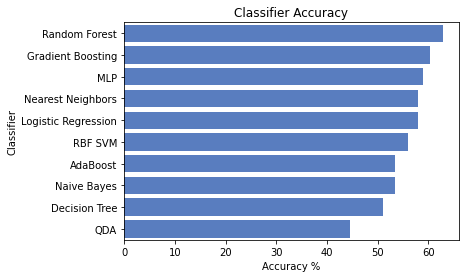

In [172]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler(feature_range=(0,1))           # feature_range=(0,1)

data_scaled = scaler.fit_transform(compound_array)

neural_networks_accuracy(data_scaled,real_labels) 